# Temperature Forecast Project using ML

## Problem Statement:

### Data Set Information:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Please note that there are two target variables here:

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day minimum temperature


## Exploring Dataset:

In [75]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [76]:
df=pd.read_csv(r"C:\Users\hp\Dropbox\PC\Desktop\Evaluation Projects\week 3\Temperature prediction\temperature.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Above is our dataset.

#### Let's understand the Attribute
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


# Exploratory Data Analysis


In [77]:
# checking Shape od dataset
df.shape

(7752, 25)

In [78]:
#Checking the data types of all columns
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [79]:
# Checking unique values
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [80]:
#Lets check the value counts now
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

15.0    310
21.0    310
7.0     310
23.0    310
8.0     310
3.0     310
10.0    310
16.0    310
11.0    310
2.0     310
13.0    310
12.0    310
9.0     310
24.0    310
4.0     310
25.0    310
22.0    310
17.0    310
19.0    310
20.0    310
1.0     310
5.0     310
18.0    310
6.0     310
14.0    310
Name: station, dtype: int64
****************************************
17-07-2016    25
18-08-2013    25
31-07-2017    25
06-08-2017    25
25-08-2014    25
              ..
24-07-2014    25
14-08-2014    25
03-07-2017    25
13-07-2016    25
23-07-2014    25
Name: Date, Length: 310, dtype: int64
****************************************
31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.3      1
20.1      1
36.9      1
20.4      1
Name: Present_Tmax, Length: 167, dtype: int64
****************************************
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
29.6      1
13.5      1
14.3      1
14.2      1
29.7      1
Name: Present_

In [81]:
#Checking null values in the dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [82]:
#lets check the unique values in station column
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [83]:
#lets check the unique values in station column
df['Date'].unique()

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '10-08-2013', '11-08-2013', '12-08-2013',
       '13-08-2013', '14-08-2013', '15-08-2013', '16-08-2013',
       '17-08-2013', '18-08-2013', '19-08-2013', '20-08-2013',
       '21-08-2013', '22-08-2013', '23-08-2013', '24-08-2013',
       '25-08-2013', '26-08-2013', '27-08-2013', '28-08-2013',
       '29-08-2013', '30-08-2013', '30-06-2014', '01-07

In [84]:
# Lets replace the null values in station column
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

#lets replace null values in 'Date' column
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

## Feature Engineering:

In [85]:
df["Date"]=pd.to_datetime(df["Date"])

#Extracting Year, month and date from Date column
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [86]:
#Succesfully extracted date, month and year from Date column.
#After extraction i can drop Date column.

df = df.drop(["Date"],axis=1)
#Printing dataset
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30


In [87]:
#Checking null values in the dataset
df.isnull().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 0
Month                0
Day                  0
dtype: int64

In [88]:
# Let's check for skewness and then decide which impution to be applied
df.skew()

station             0.000182
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Year               -0.000365
Month              -0.705586
Day                 0.245283
dtype: float64

In [89]:
#Replacing nan values in columns having skewness
df["LDAPS_RHmax"] = df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].median())
df["LDAPS_Tmin_lapse"] = df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].median())
df["LDAPS_WS"] = df["LDAPS_WS"].fillna(df["LDAPS_WS"].median())
df["LDAPS_LH"] = df["LDAPS_LH"].fillna(df["LDAPS_LH"].median())
df["LDAPS_CC3"] = df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].median())
df["LDAPS_CC4"] = df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].median())
df["LDAPS_PPT1"] = df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].median())
df["LDAPS_PPT2"] = df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].median())
df["LDAPS_PPT3"] = df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].median())
df["LDAPS_PPT4"] = df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].median())

In [90]:
#Replacing nan values in columns without skewness
df["Present_Tmax"] = df["Present_Tmax"].fillna(df["Present_Tmax"].mean())
df["Present_Tmin"] = df["Present_Tmin"].fillna(df["Present_Tmin"].mean())
df["LDAPS_RHmin"] = df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].mean())
df["LDAPS_Tmax_lapse"] = df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].mean())
df["LDAPS_CC1"] = df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].mean())
df["LDAPS_CC2"] = df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].mean())
df["Next_Tmax"] = df["Next_Tmax"].fillna(df["Next_Tmax"].mean())
df["Next_Tmin"] = df["Next_Tmin"].fillna(df["Next_Tmin"].mean())

In [91]:
# I've treated null value , now lets confirm it
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

In [92]:
#If the column entries in the dataset are consecutive it will create problem while building the model so let me shuffel the data.

#Shuffeling the dataset
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace = True)
df

,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,2294,20.0,29.1,22.5,68.212257,90.978607,29.243381,22.075863,5.918012,72.597159,...,37.6181,127.004,146.5540,4.7296,5547.700195,32.7,23.8,2014,7,29
1,2103,4.0,28.2,24.4,61.587154,97.405365,28.890209,23.519490,7.937826,122.355965,...,37.6450,127.022,45.7160,2.5348,5602.210449,26.9,20.5,2014,7,22
2,2225,1.0,26.7,18.5,49.236366,90.280128,29.597316,20.910600,6.028088,94.689420,...,37.6046,126.991,212.3350,2.7850,5651.470703,28.6,19.6,2014,7,27
3,1703,4.0,29.8,23.4,33.568981,84.082321,31.907257,21.260309,6.683658,99.995370,...,37.6450,127.022,45.7160,2.5348,5815.985352,34.7,20.9,2014,6,7
4,6028,4.0,32.5,26.8,56.681248,97.050232,29.792496,23.345903,6.861524,113.535375,...,37.6450,127.022,45.7160,2.5348,4642.163574,33.3,23.5,2016,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,7335,11.0,26.3,22.6,74.309662,90.953728,23.908329,21.389531,8.472641,53.989001,...,37.5372,127.085,28.7000,0.6233,5039.804199,24.6,20.7,2017,8,14
7748,3626,2.0,27.8,22.5,50.995296,95.622231,31.625947,24.702206,5.038100,51.725885,...,37.6046,127.032,44.7624,0.5141,5633.040527,32.2,23.4,2015,7,21
7749,1788,14.0,33.5,24.5,22.338659,91.217873,35.545044,25.091359,8.040274,35.168378,...,37.4967,126.927,30.9680,0.6180,5788.166992,33.4,25.0,2014,9,7
7750,6008,9.0,32.7,27.4,56.722649,88.820808,30.065661,24.794955,5.193738,91.445210,...,37.4967,126.826,50.9312,0.4125,4701.743164,32.7,26.0,2016,8,23


In [93]:
#lets drop the index column as its just row no
df.drop(columns = 'index', inplace = True)

In [94]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,20.0,29.1,22.5,68.212257,90.978607,29.243381,22.075863,5.918012,72.597159,0.053521,...,37.6181,127.004,146.554,4.7296,5547.700195,32.7,23.8,2014,7,29
1,4.0,28.2,24.4,61.587154,97.405365,28.890209,23.519490,7.937826,122.355965,0.827853,...,37.6450,127.022,45.716,2.5348,5602.210449,26.9,20.5,2014,7,22
2,1.0,26.7,18.5,49.236366,90.280128,29.597316,20.910600,6.028088,94.689420,0.010584,...,37.6046,126.991,212.335,2.7850,5651.470703,28.6,19.6,2014,7,27
3,4.0,29.8,23.4,33.568981,84.082321,31.907257,21.260309,6.683658,99.995370,0.313690,...,37.6450,127.022,45.716,2.5348,5815.985352,34.7,20.9,2014,6,7
4,4.0,32.5,26.8,56.681248,97.050232,29.792496,23.345903,6.861524,113.535375,0.099389,...,37.6450,127.022,45.716,2.5348,4642.163574,33.3,23.5,2016,8,24


In [95]:
#Checking for empty observations
df.loc[df['Next_Tmax'] == " "]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day


In [96]:
#Checking for empty observations
df.loc[df['Next_Tmin'] == " "]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day


In [97]:
#Checking statistics of data set
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.997033,29.768211,23.225059,56.759372,88.388529,29.613447,23.514984,7.092549,62.450457,0.368774,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,2015.000516,7.080882,16.374742
std,7.213007,2.956557,2.403036,14.596973,7.158471,2.932898,2.334099,2.173913,33.571540,0.261185,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,1.414487,2.238124,8.243617
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.313244,89.793480,29.662273,23.760199,6.547470,56.865482,0.320110,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


## Data Visualization

### univariate analysis:

In [98]:
# Distributing numeric and categorical colmn

# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)


# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

[]
['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']


In [99]:
len(categorical_columns)

0

In [100]:
len(numerical_columns)

27

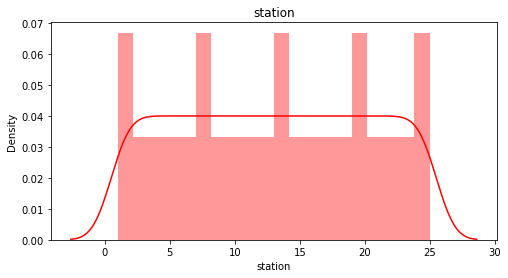

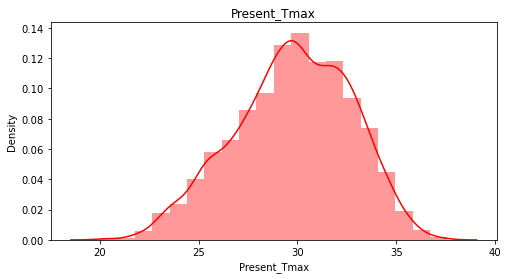

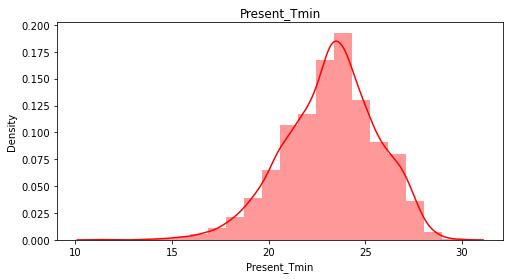

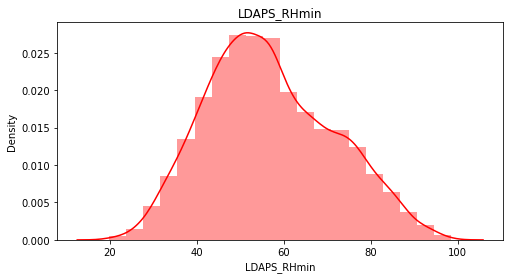

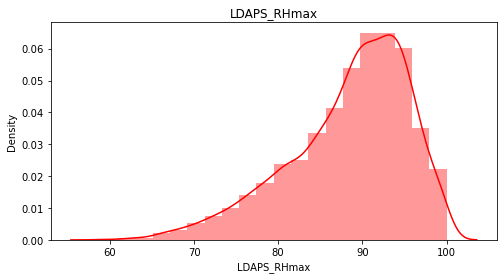

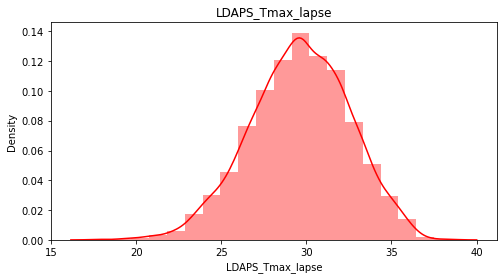

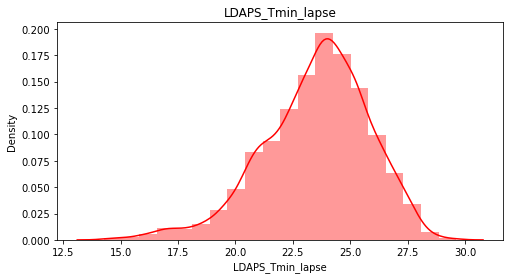

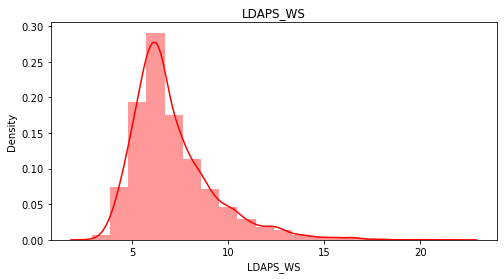

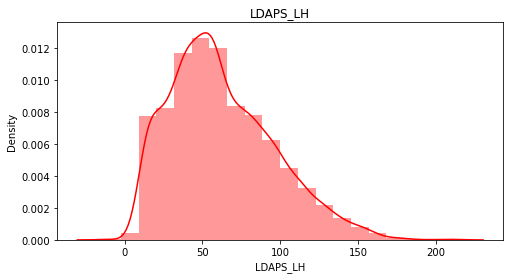

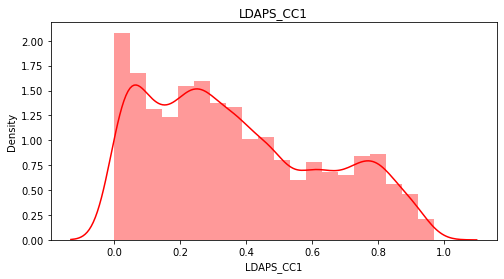

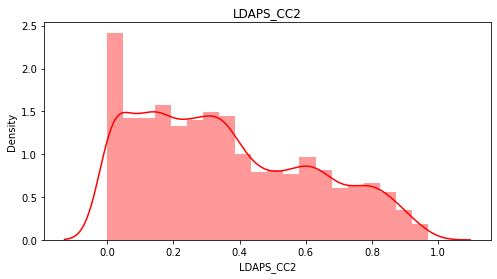

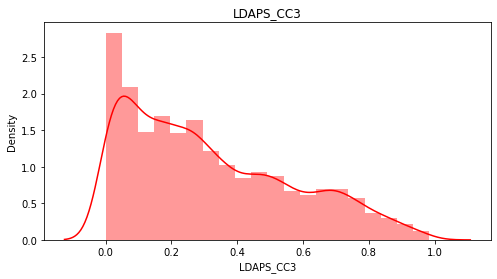

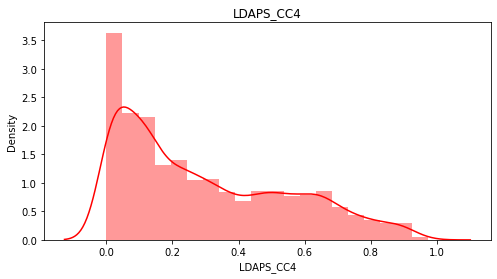

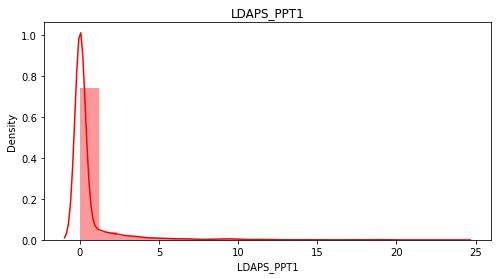

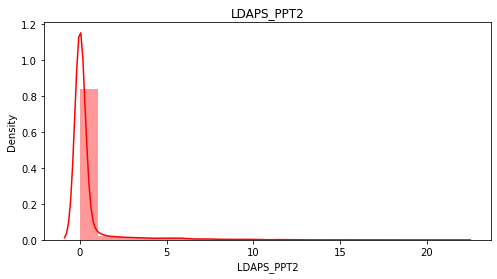

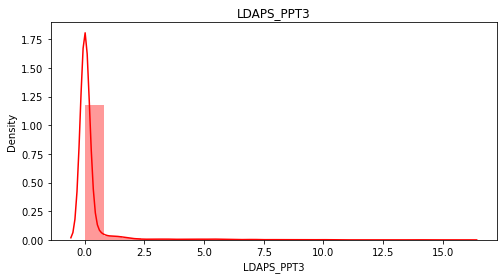

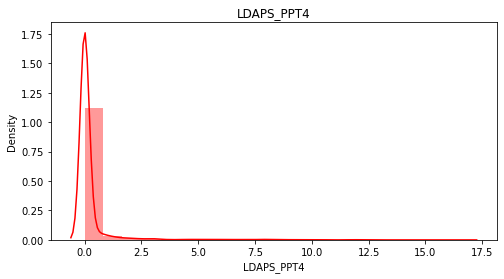

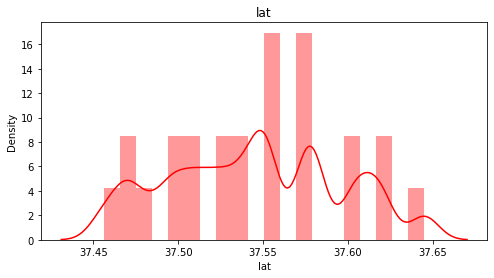

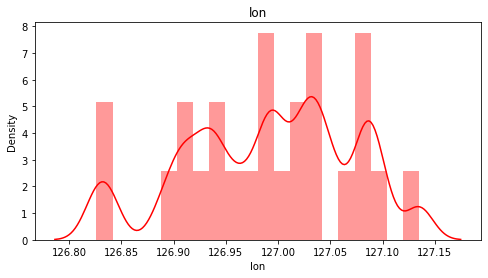

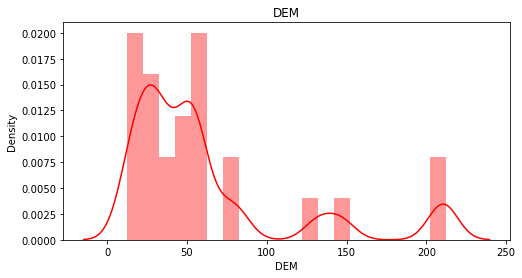

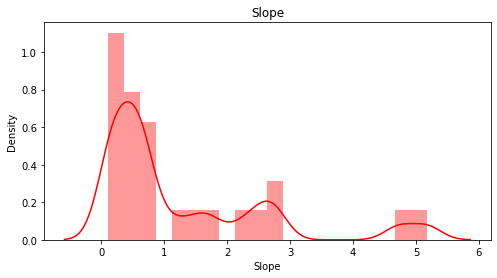

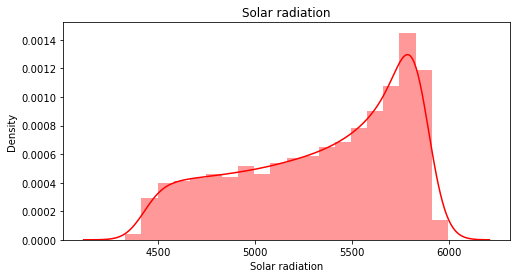

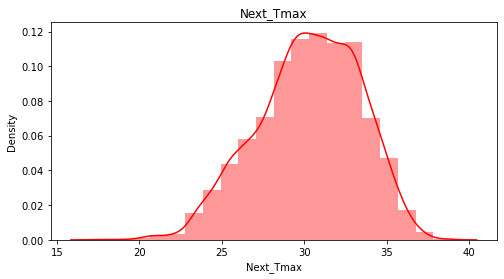

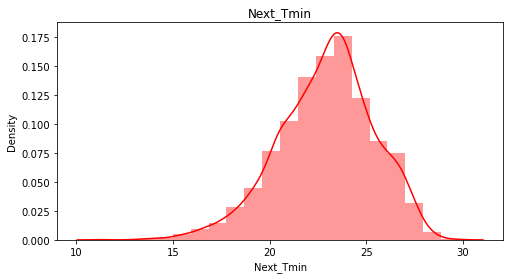

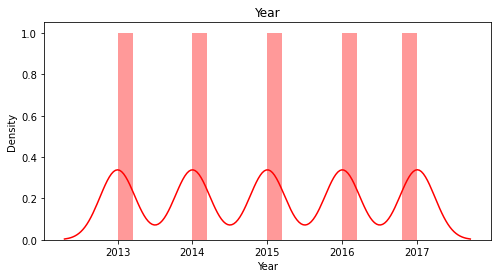

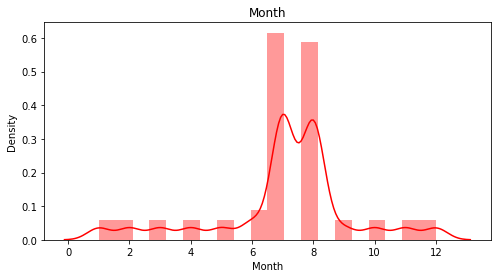

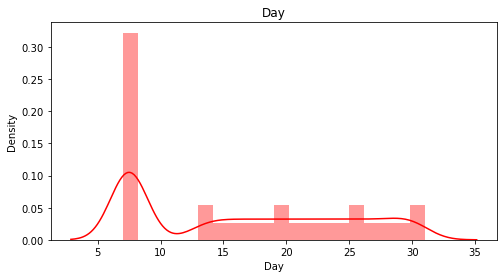

In [101]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 20, color="r")
    plt.title(i)
    plt.show()

All of our data seems to be skweed . we'll treat it later, but lets us first viually analyse our entire data.

### Bivariate analysis

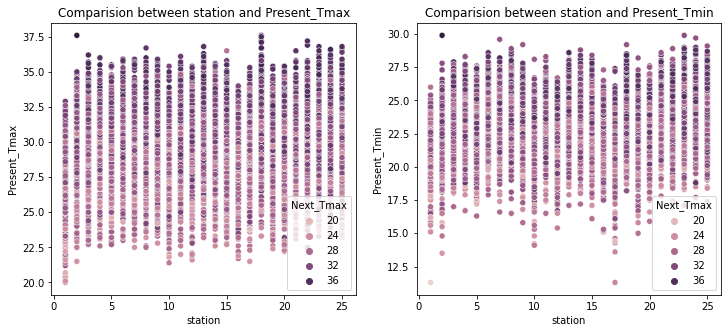

In [102]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between station and Present_Tmax')
sns.scatterplot(df['station'],df['Present_Tmax'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between station and Present_Tmin')
sns.scatterplot(df['station'],df['Present_Tmin'],hue=df['Next_Tmax']);
plt.show()

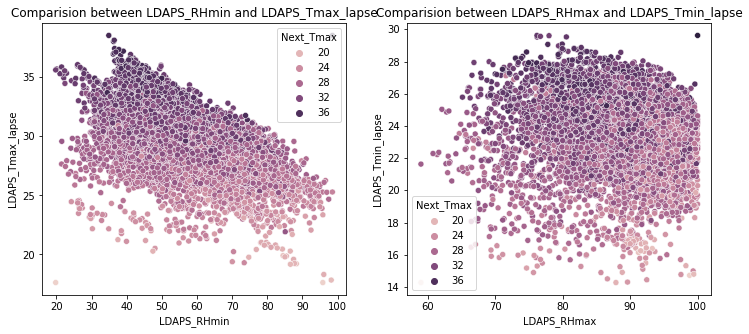

In [103]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_RHmin and LDAPS_Tmax_lapse')
sns.scatterplot(df['LDAPS_RHmin'],df['LDAPS_Tmax_lapse'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_RHmax and LDAPS_Tmin_lapse')
sns.scatterplot(df['LDAPS_RHmax'],df['LDAPS_Tmin_lapse'],hue=df['Next_Tmax']);
plt.show()

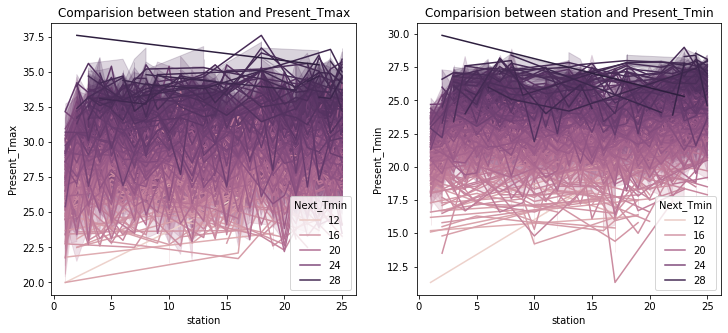

In [104]:
#Comparision between features using line plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between station and Present_Tmax')
sns.lineplot(df['station'],df['Present_Tmax'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between station and Present_Tmin')
sns.lineplot(df['station'],df['Present_Tmin'],hue=df['Next_Tmin']);
plt.show()

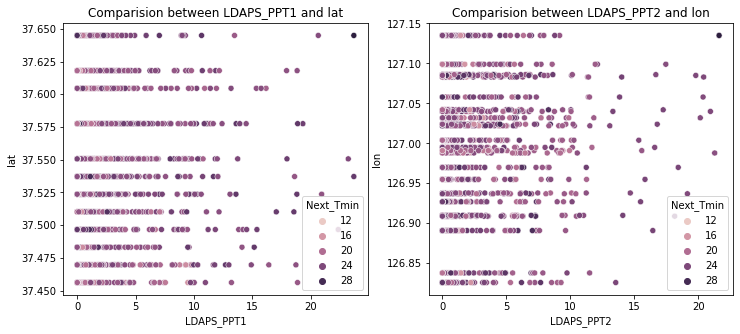

In [105]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_PPT1 and lat')
sns.scatterplot(df['LDAPS_PPT1'],df['lat'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_PPT2 and lon')
sns.scatterplot(df['LDAPS_PPT2'],df['lon'],hue=df['Next_Tmin']);
plt.show()

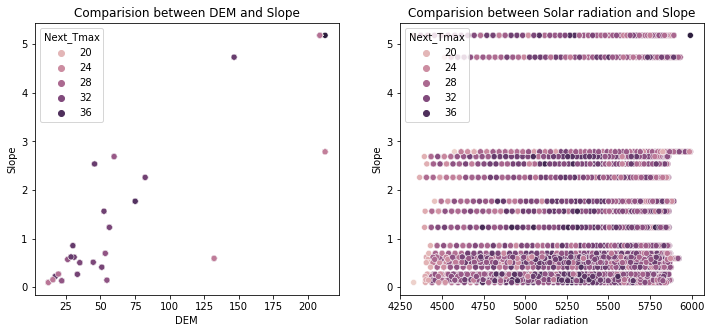

In [106]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between DEM and Slope')
sns.scatterplot(df['DEM'],df['Slope'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Solar radiation and Slope')
sns.scatterplot(df['Solar radiation'],df['Slope'],hue=df['Next_Tmax']);
plt.show()

#### Checking for ouliers

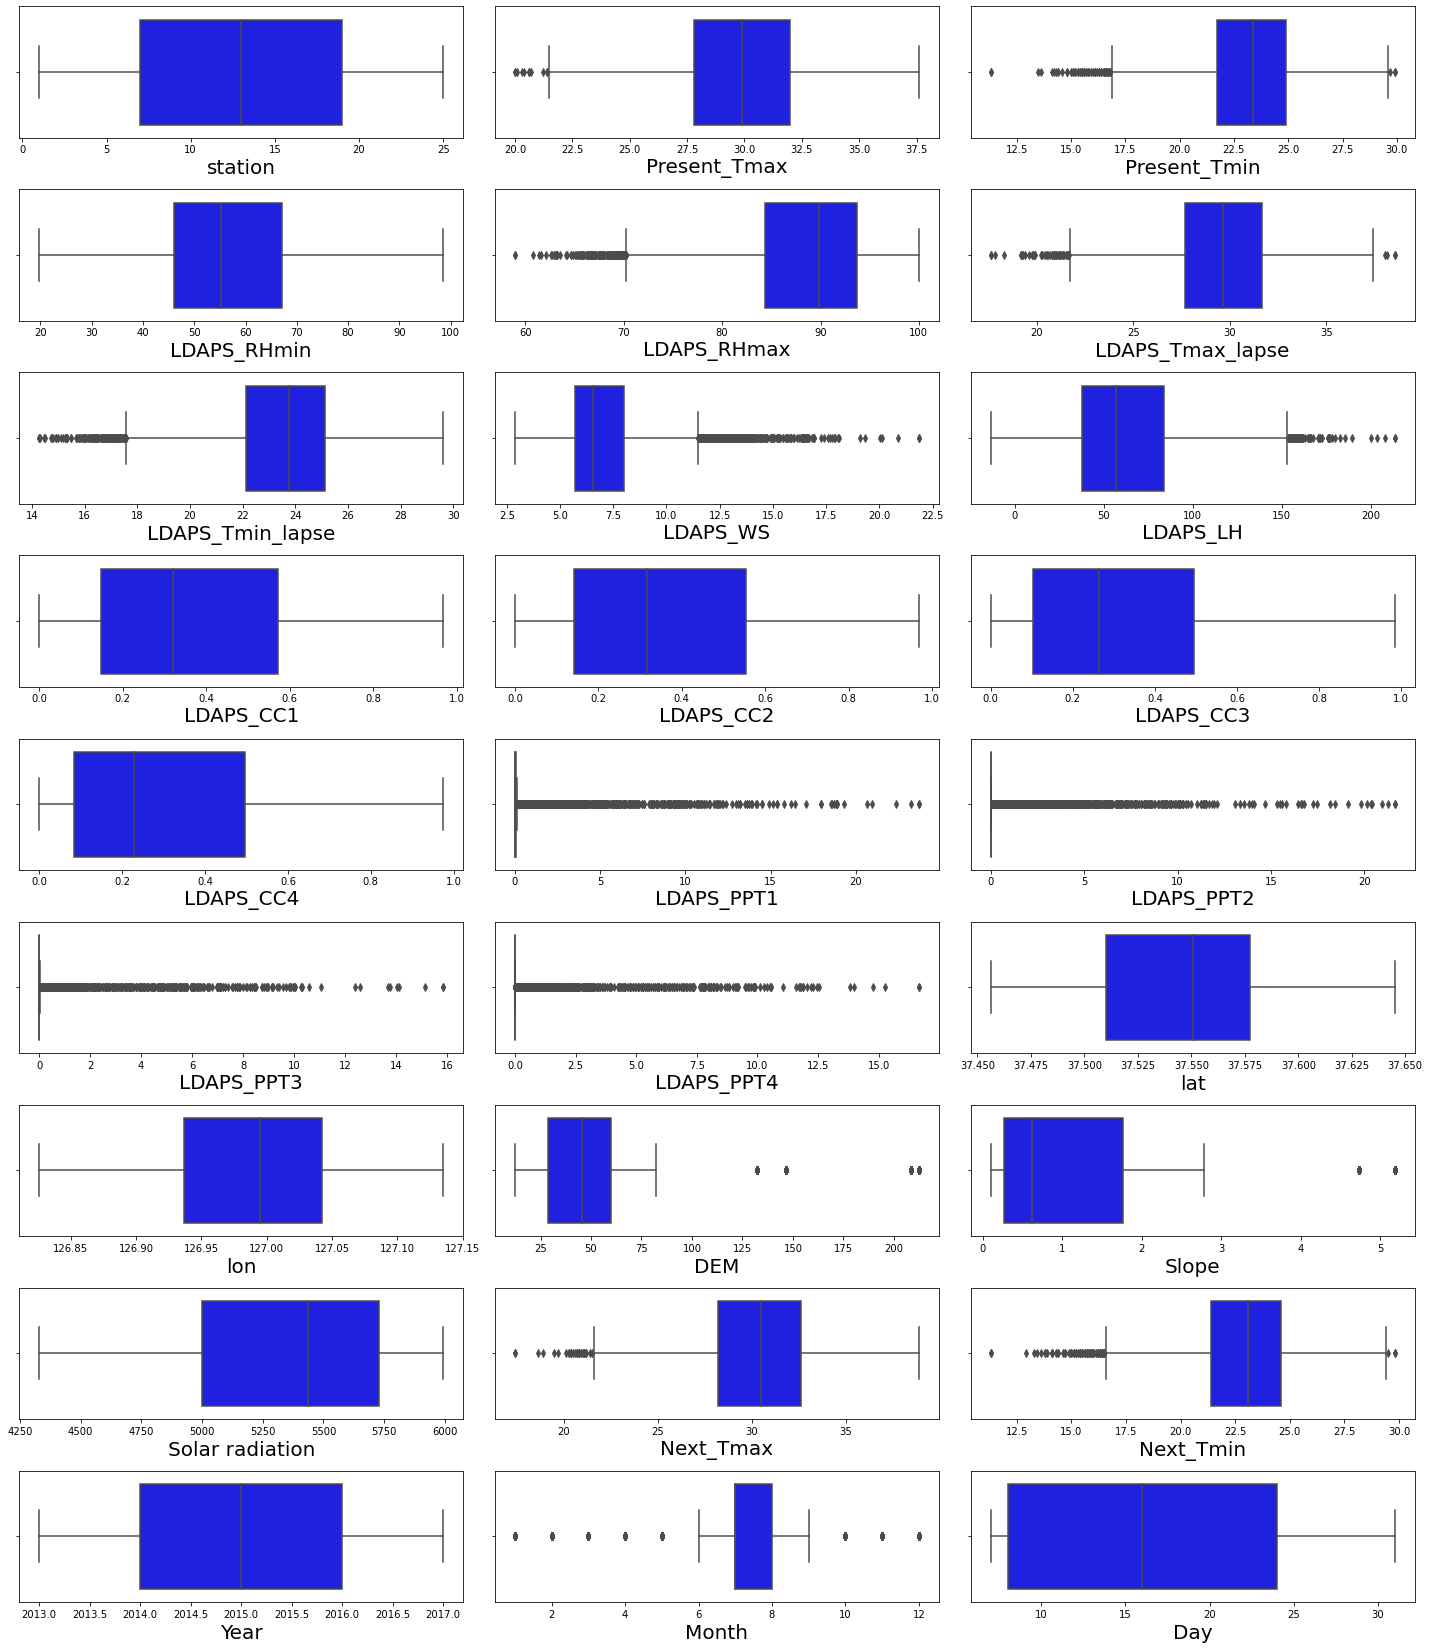

In [107]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [108]:
 #Removing outliers:
# i) Zscore Method:
#Features having outliers
features=df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Month']]
#Above are the list of columns with outliers.

from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,20.0,29.1,22.5,68.212257,90.978607,29.243381,22.075863,5.918012,72.597159,0.053521,...,37.6181,127.004,146.5540,4.7296,5547.700195,32.7,23.8,2014,7,29
1,4.0,28.2,24.4,61.587154,97.405365,28.890209,23.519490,7.937826,122.355965,0.827853,...,37.6450,127.022,45.7160,2.5348,5602.210449,26.9,20.5,2014,7,22
2,1.0,26.7,18.5,49.236366,90.280128,29.597316,20.910600,6.028088,94.689420,0.010584,...,37.6046,126.991,212.3350,2.7850,5651.470703,28.6,19.6,2014,7,27
3,4.0,29.8,23.4,33.568981,84.082321,31.907257,21.260309,6.683658,99.995370,0.313690,...,37.6450,127.022,45.7160,2.5348,5815.985352,34.7,20.9,2014,6,7
4,4.0,32.5,26.8,56.681248,97.050232,29.792496,23.345903,6.861524,113.535375,0.099389,...,37.6450,127.022,45.7160,2.5348,4642.163574,33.3,23.5,2016,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,20.0,29.3,22.6,36.003876,84.217941,31.130372,20.895589,6.334122,91.579865,0.320888,...,37.6181,127.004,146.5540,4.7296,5892.493652,33.9,20.4,2014,6,7
7748,2.0,27.8,22.5,50.995296,95.622231,31.625947,24.702206,5.038100,51.725885,0.403861,...,37.6046,127.032,44.7624,0.5141,5633.040527,32.2,23.4,2015,7,21
7749,14.0,33.5,24.5,22.338659,91.217873,35.545044,25.091359,8.040274,35.168378,0.487975,...,37.4967,126.927,30.9680,0.6180,5788.166992,33.4,25.0,2014,9,7
7750,9.0,32.7,27.4,56.722649,88.820808,30.065661,24.794955,5.193738,91.445210,0.419214,...,37.4967,126.826,50.9312,0.4125,4701.743164,32.7,26.0,2016,8,23


In [109]:
#Checking dataloss in zscore method
Dataloss = (((7752-6907)/7752)*100)
Dataloss

10.900412796697626

In [110]:
#ii) IQR method:

# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [111]:
#Checking dataloss in IQR
Dataloss = (((7752-2413)/7752)*100)
Dataloss

68.87254901960785

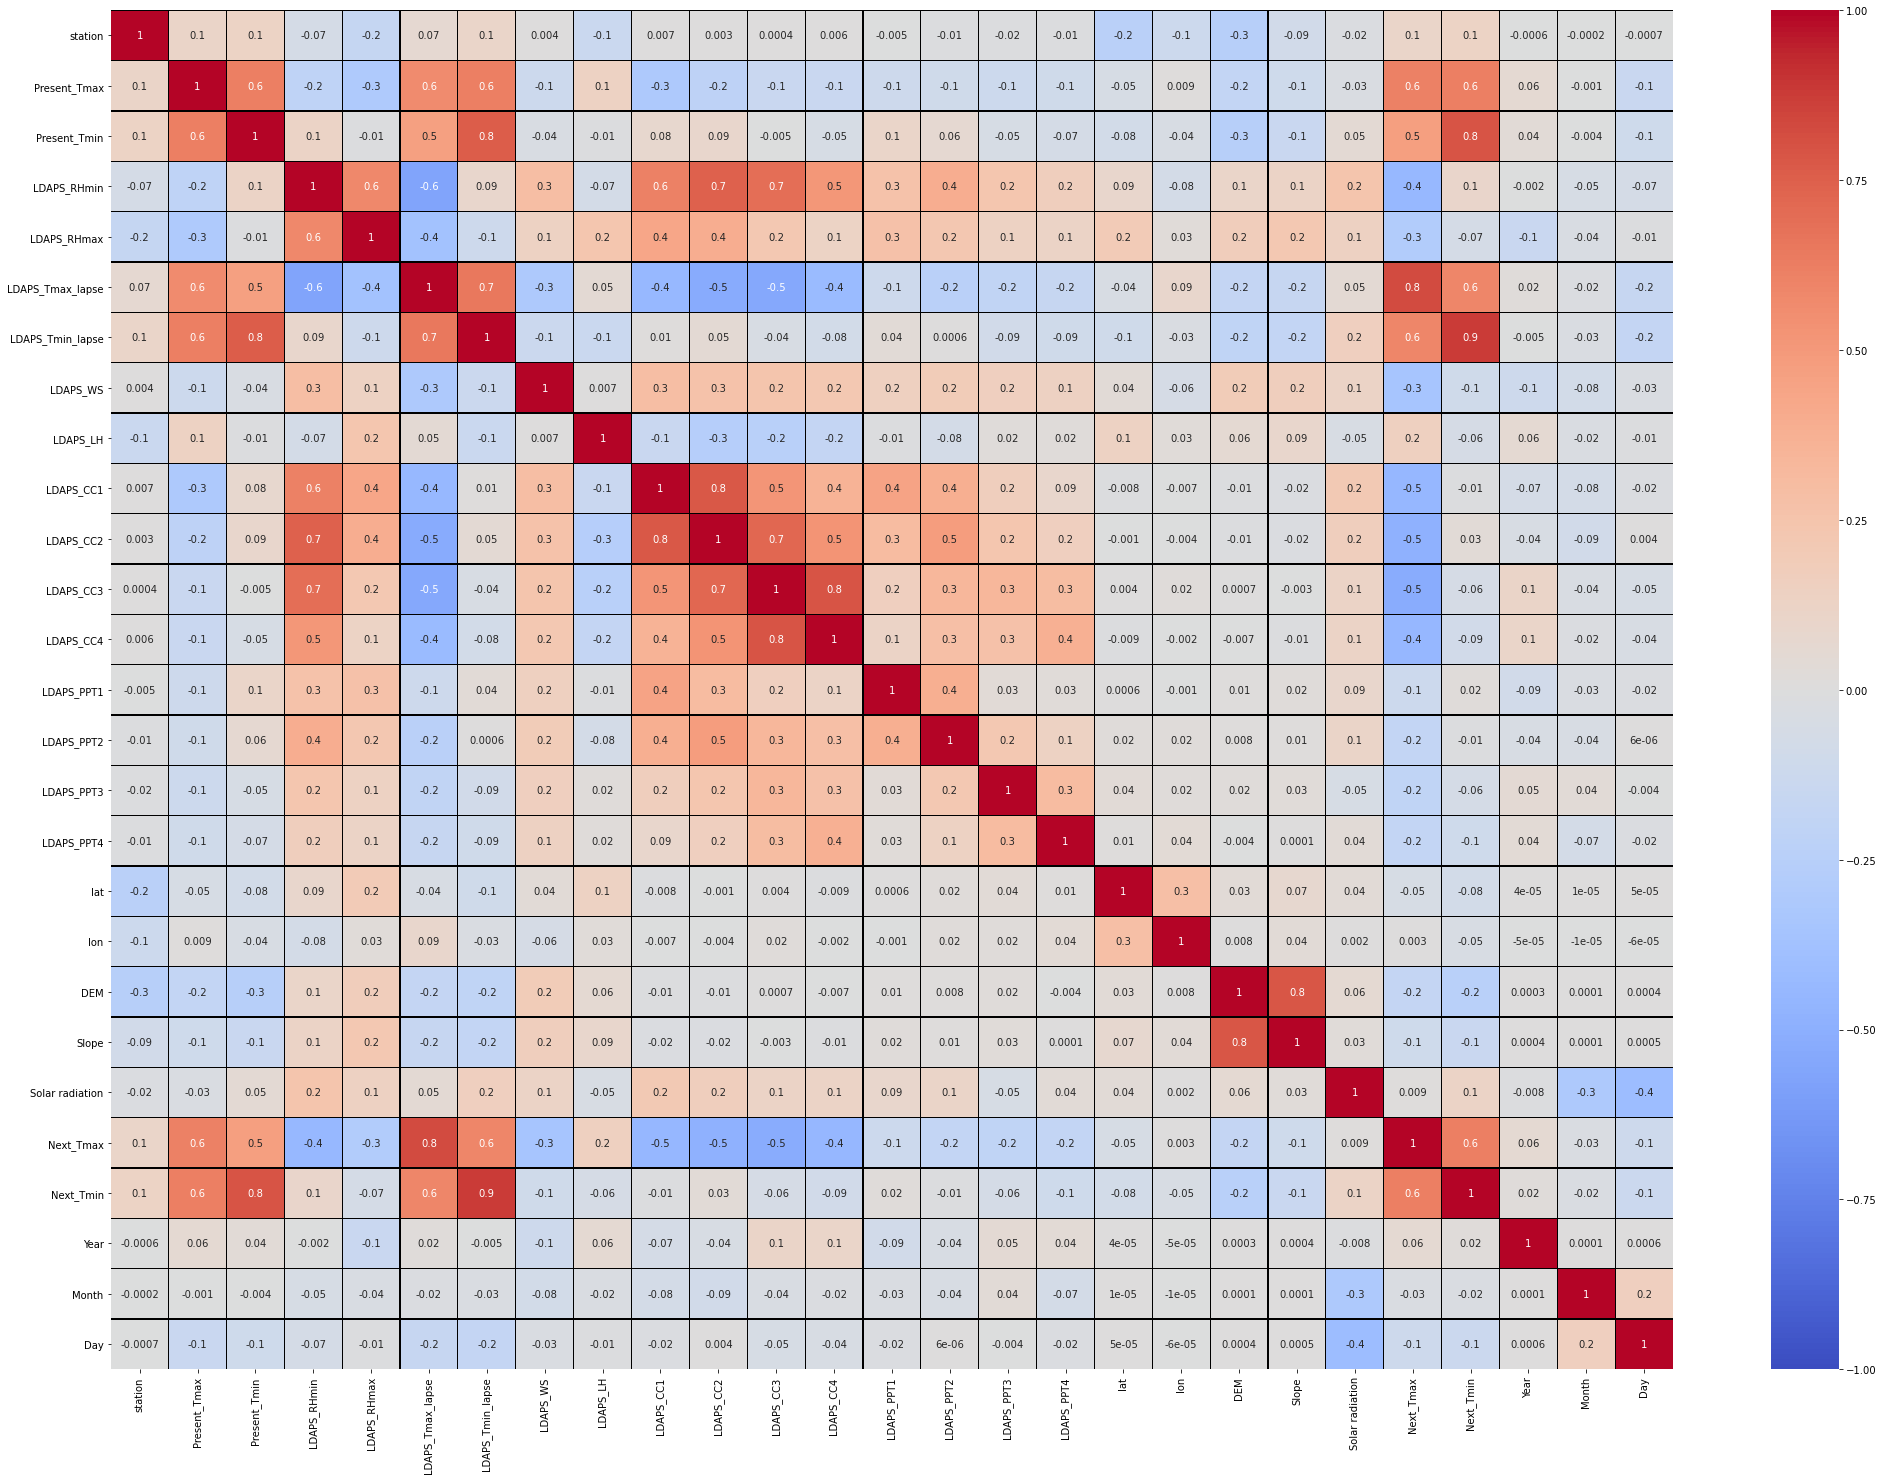

In [112]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(35,25))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

## i) Prediction and model building for target Next_Tmax:

In [113]:
#Separating features and label:
x = df.drop("Next_Tmax",axis=1)
y = df["Next_Tmax"]

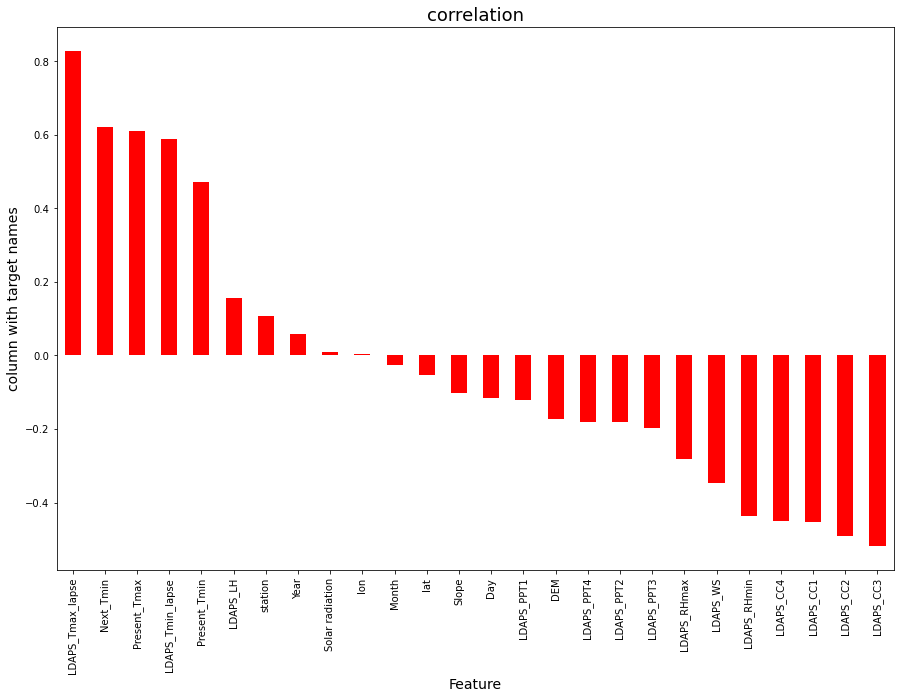

In [114]:
#Bar plot for correlations of Next_Tmax column with other features:
plt.figure(figsize=(15,10))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [115]:
#Checking for skewness
x.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmin          -0.404447
Year               -0.000365
Month              -0.705586
Day                 0.245283
dtype: float64

In [116]:
#Removing skewness using yeo-johnson:

#list of skewed features

skew_fea=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

#Removing skewness using yeo-johnson
x[skew_fea] = scaler.fit_transform(x[skew_fea].values)

#Checking skewness after removing skewness
x[skew_fea].skew()


LDAPS_RHmax        -0.116481
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Month               0.043780
dtype: float64

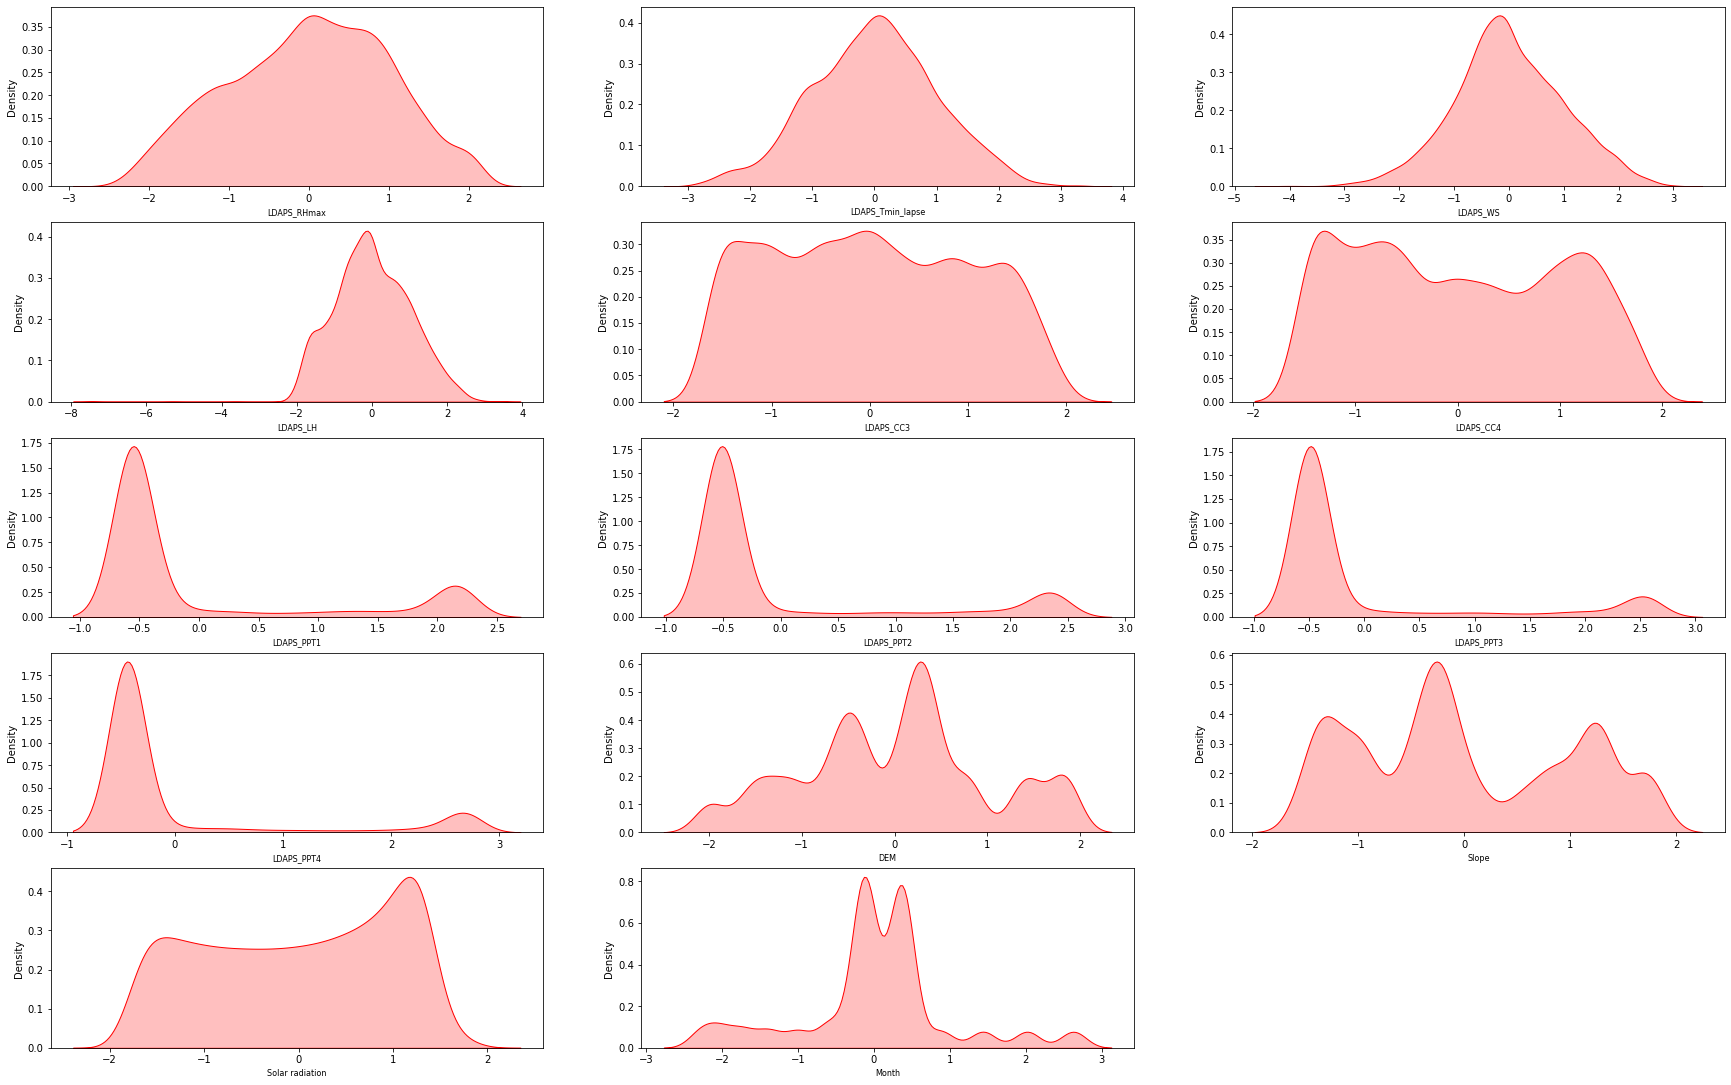

In [117]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in x[skew_fea]:
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(x[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show()

In [118]:
#Scaling the data using MinMax scaler:

#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(x), columns=x.columns)



### Using VIF to remove multicolinearity:

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,4.535428,station
1,34.326786,Present_Tmax
2,87.573461,Present_Tmin
3,46.304936,LDAPS_RHmin
4,18.931767,LDAPS_RHmax
5,91.235502,LDAPS_Tmax_lapse
6,65.391863,LDAPS_Tmin_lapse
7,20.706292,LDAPS_WS
8,64.171809,LDAPS_LH
9,15.196003,LDAPS_CC1


In [120]:
#Droping highly VIF columns
X = X.drop(["Present_Tmax","Present_Tmin","LDAPS_RHmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","DEM","Next_Tmin"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.351106,station
1,4.804779,LDAPS_CC4
2,1.839824,LDAPS_PPT1
3,2.089165,LDAPS_PPT2
4,1.961893,LDAPS_PPT3
5,1.977027,LDAPS_PPT4
6,4.408288,lat
7,5.375382,lon
8,3.128130,Slope
9,4.547062,Solar radiation


In [123]:
#Finding Best Random State and Accuracy:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [124]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9125930909844627  on Random_state  132


In [126]:
#I got the best accuracy and random state.
#Creating train test split.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

In [127]:

#importing Regression Algorithms:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

### 1) RandomForestRegressor

In [128]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9115170210019612
mean_squared_error: 0.857938849163567
mean_absolute_error: 0.6700477884725087
root_mean_squared_error: 0.9262498848386255


### 2) XGBRegressor

In [129]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9132908894805425
mean_squared_error: 0.8407392623242124
mean_absolute_error: 0.6879871440569286
root_mean_squared_error: 0.9169183509583677


### 3) ExtraTreesRegressor

In [130]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9255693746065012
mean_squared_error: 0.7216859763959605
mean_absolute_error: 0.6157720962136207
root_mean_squared_error: 0.8495210276361383


### 4) GradientBoostingRegressor

In [131]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7287139253249062
mean_squared_error: 2.6304139545980956
mean_absolute_error: 1.2685629293138017
root_mean_squared_error: 1.6218550966711223


### 5) DecisionTreeRegressor

In [132]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7811014006783656
mean_squared_error: 2.1224603252754664
mean_absolute_error: 0.9553414476009205
root_mean_squared_error: 1.4568666120395053


### 6) KNN

In [133]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6768417153190889
mean_squared_error: 3.133371525194223
mean_absolute_error: 1.3551311556152903
root_mean_squared_error: 1.7701331941959122


### Cross validation score:

In [134]:
print("Random Forest",cross_val_score(RFR,X,y,cv=5).mean())

print("XGBoost",cross_val_score(XGB,X,y,cv=5).mean())

print("Extra Gradient Regressor",cross_val_score(ETR,X,y,cv=5).mean())

print("Gradient Boosting",cross_val_score(GBR,X,y,cv=5).mean())

print("Decision Tree",cross_val_score(DTR,X,y,cv=5).mean())

print("KNN",cross_val_score(knn,X,y,cv=5).mean())

Random Forest 0.9036319091403057
XGBoost 0.907896313106899
Extra Gradient Regressor 0.9230906611595919
Gradient Boosting 0.7188239304771346
Decision Tree 0.8024569534662179
KNN 0.6621484880490565


### Hyper parameter tuning:

In [135]:

#importing necessary libraries
from sklearn.model_selection import GridSearchCV
parameter = {'gamma':np.arange(0,0.1),
             'n_estimators':[100,1000],
             'max_depth': [4,6,10],
              'n_jobs':[-2,-1]}

In [136]:
GCV=GridSearchCV(XGBRegressor(verbosity=0),parameter,cv=5)
GCV.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [137]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimators': 1000, 'n_jobs': -2}

In [138]:
Best_mod=XGBRegressor(gamma=0.0,max_depth=6,n_estimators=1000,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 91.7442850991205
mean_squared_error: 0.8004814735317686
mean_absolute_error: 0.6729350661575435
RMSE value: 0.8946963024019763


## Saving Model:

In [139]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Next_Tmax.pkl")

['Next_Tmax.pkl']

## Predictions for Next_Tmax:

In [140]:
# Loading the saved model
model=joblib.load("Next_Tmax.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([34.5746  , 32.30458 , 31.465147, ..., 29.35136 , 25.277159,
       27.316889], dtype=float32)

In [141]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325
Predicted,34.5746,32.304581,31.465147,34.322449,29.739653,27.692072,34.414185,29.584398,30.60968,32.318901,...,32.025032,32.916599,27.71773,32.559723,24.792467,28.129183,34.096455,29.35136,25.277159,27.316889
Actual,35.3000,33.000000,31.000000,35.600000,30.400000,27.400000,34.200000,28.600000,30.90000,32.400000,...,32.200000,33.000000,27.50000,33.700000,25.700000,25.200000,34.600000,30.80000,23.500000,26.800000


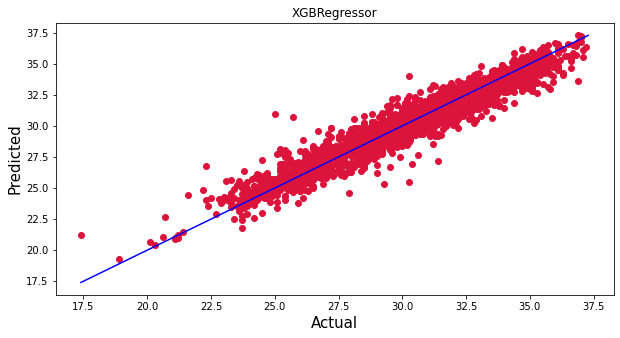

In [142]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

## ii) Prediction and model building for target Next_Tmin:

In [143]:
#Separating features and label:
x_1 = df.drop("Next_Tmin",axis=1)
y_1 = df["Next_Tmin"]

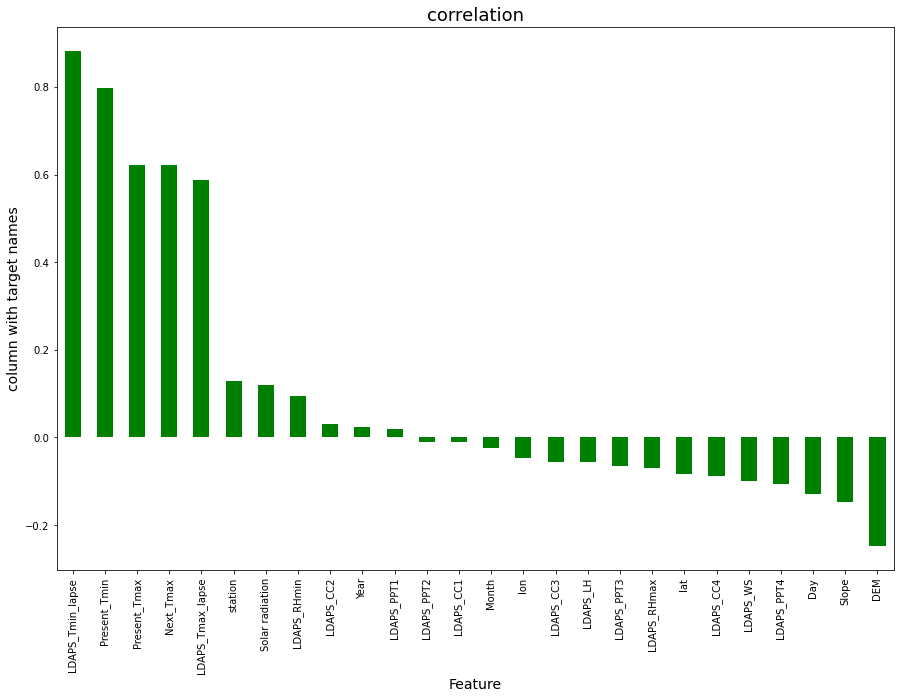

In [144]:
#Bar plot for correlations of Next_Tmin column with other features:
plt.figure(figsize=(15,10))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [145]:
#Checking for skewness
x_1.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Year               -0.000365
Month              -0.705586
Day                 0.245283
dtype: float64

In [146]:
#Removing skewness using yeo-johnson:

#list of skewed features
skew_fea=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']


In [147]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
#Removing skewness using yeo-johnson
x_1[skew_fea] = scaler.fit_transform(x_1[skew_fea].values)

In [148]:
#Checking skewness after removing skewness
x_1[skew_fea].skew()

LDAPS_RHmax        -0.116481
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Month               0.043780
dtype: float64

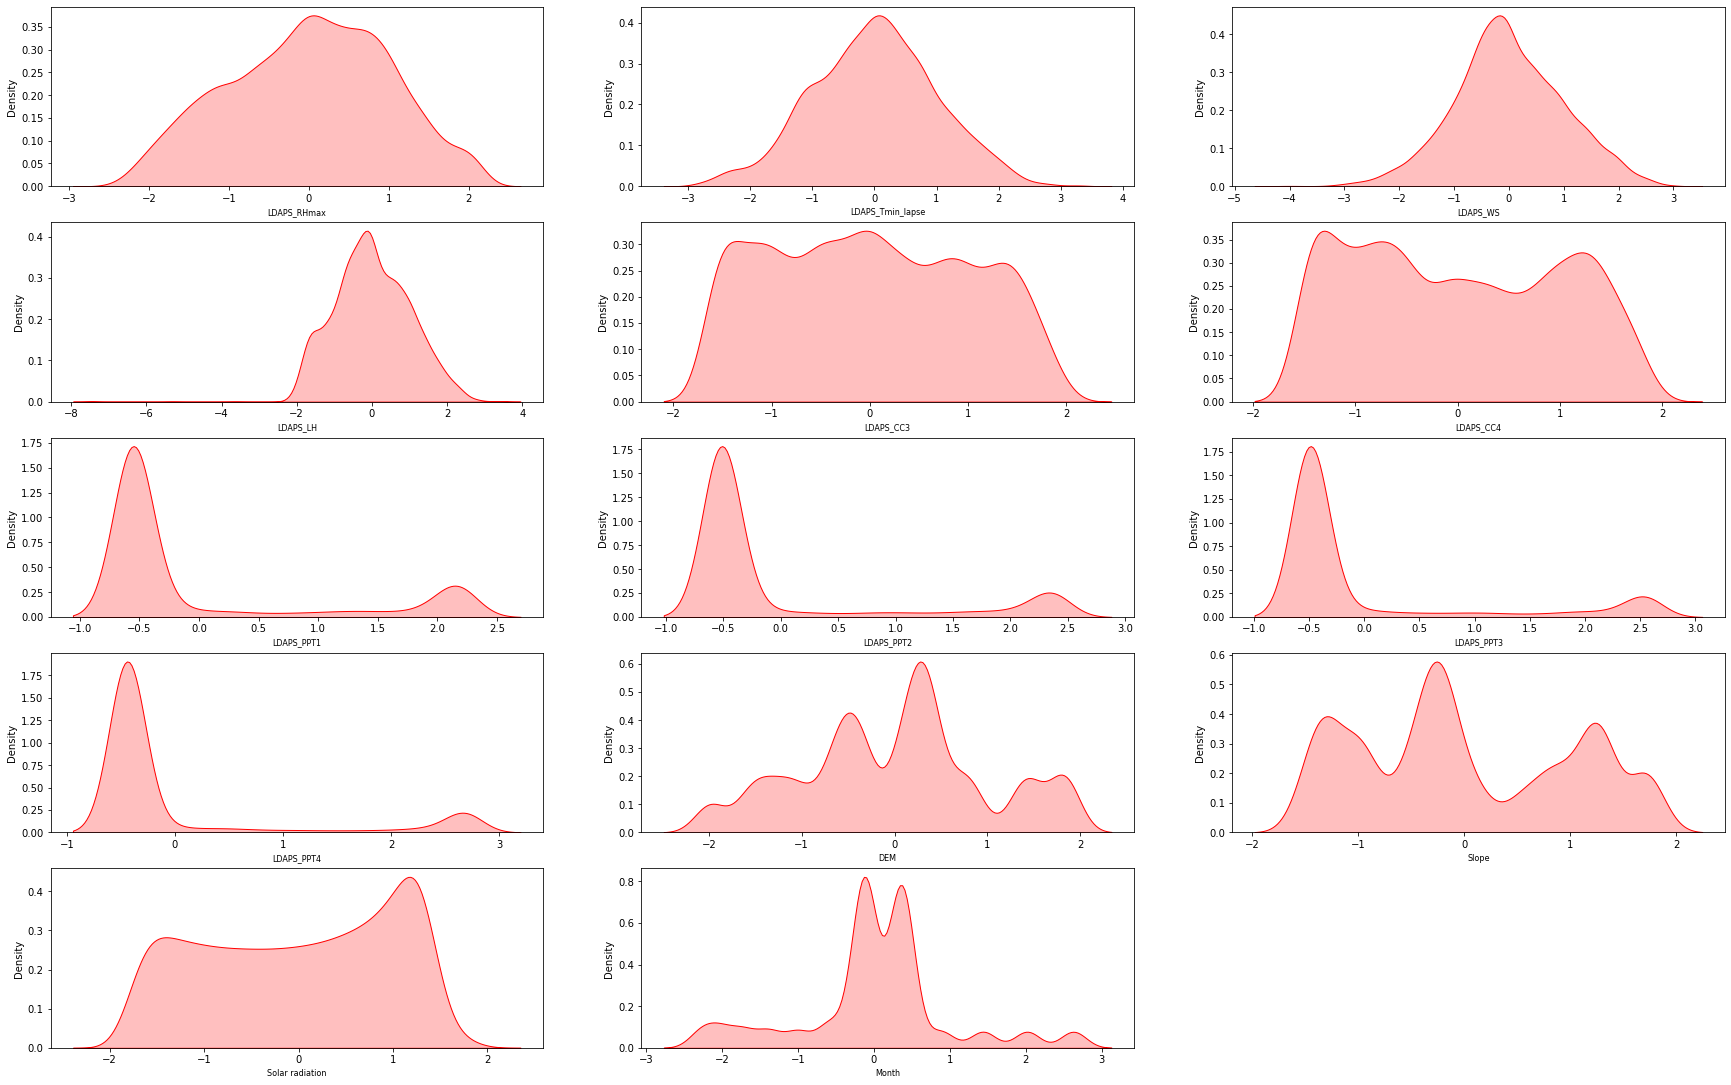

In [149]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in x_1[skew_fea]:
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(x_1[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show()

In [150]:
#Scaling the data using MinMax scaler:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_1 = pd.DataFrame(mms.fit_transform(x_1), columns=x_1.columns)

## Using VIF to remove multicolinearity:

In [151]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,4.598736,station
1,35.154944,Present_Tmax
2,78.080026,Present_Tmin
3,45.986393,LDAPS_RHmin
4,18.751390,LDAPS_RHmax
5,120.720770,LDAPS_Tmax_lapse
6,53.866135,LDAPS_Tmin_lapse
7,20.862029,LDAPS_WS
8,65.951880,LDAPS_LH
9,15.227578,LDAPS_CC1


In [156]:
#Droping highly VIF columns
X_1 = X_1.drop(["Present_Tmax","Present_Tmin","LDAPS_RHmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse","LDAPS_WS","LDAPS_LH","LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","DEM","Next_Tmax"],axis=1)

In [157]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

,vif_Features,Features
0,3.351106,station
1,4.804779,LDAPS_CC4
2,1.839824,LDAPS_PPT1
3,2.089165,LDAPS_PPT2
4,1.961893,LDAPS_PPT3
5,1.977027,LDAPS_PPT4
6,4.408288,lat
7,5.375382,lon
8,3.128130,Slope
9,4.547062,Solar radiation


In [158]:
# Finding best random state
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X_1,y_1,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9113818527725921  on Random_state  182


In [159]:
# creating Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X_1,y_1,test_size=.30,random_state=maxRS)


### 1)RandomForestRegressor

In [181]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9112490280777703
mean_squared_error: 0.571504029807317
mean_absolute_error: 0.5593160496651056
root_mean_squared_error: 0.7559788553969727


### 2)XGBRegressor

In [182]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9250524655056503
mean_squared_error: 0.4826180160052454
mean_absolute_error: 0.5229888721837666
root_mean_squared_error: 0.6947071440580163


### 3)GradientBoostingRegressor

In [183]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7551035363813241
mean_squared_error: 1.5769891057224381
mean_absolute_error: 0.9778589729363146
root_mean_squared_error: 1.2557822684376612


### 4)DecisionTreeRegressor

In [184]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8050663899220118
mean_squared_error: 1.2552577317359432
mean_absolute_error: 0.793882682605804
root_mean_squared_error: 1.1203828505184927


### 5)Knn

In [185]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.6207570237678399
mean_squared_error: 2.442101584901211
mean_absolute_error: 1.1466433601304515
root_mean_squared_error: 1.5627224913276225


### Cross validation

In [186]:
print("Random Forest",cross_val_score(RFR,X,y,cv=5).mean())

print("XGBoost",cross_val_score(XGB,X,y,cv=5).mean())


print("Gradient Boosting",cross_val_score(GBR,X,y,cv=5).mean())

print("Decision Tree",cross_val_score(DTR,X,y,cv=5).mean())

print("KNN",cross_val_score(knn,X,y,cv=5).mean())

Random Forest 0.9028788546337175
XGBoost 0.907896313106899
Gradient Boosting 0.7189772444767657
Decision Tree 0.8088150170275782
KNN 0.6621484880490565


## Hyper Parameter Tuning

In [194]:

from pprint import pprint
pprint(DTR.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [215]:
parameter = {'max_leaf_nodes':[150,250,300],
         'max_depth': (12,20,35),
          'min_samples_leaf': (2,4,8,15)
         }

In [216]:
GCV=GridSearchCV(DTR,parameter,cv=5)
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': (12, 20, 35),
                         'max_leaf_nodes': [150, 250, 300],
                         'min_samples_leaf': (2, 4, 8, 15)})

In [217]:
GCV.best_params_

{'max_depth': 35, 'max_leaf_nodes': 300, 'min_samples_leaf': 8}

In [218]:
Best_mod_1=DecisionTreeRegressor(max_depth=35, max_leaf_nodes=300,min_samples_leaf=8)
Best_mod_1.fit(X_train,y_train)
pred=Best_mod_1.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 81.25560739456309
mean_squared_error: 1.2070285742543492
mean_absolute_error: 0.8123518099752847
RMSE value: 1.098648521709445


## Saving the model

In [220]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod_1,"Next_Tmin.pkl")

['Next_Tmin.pkl']

## Predictions for Next_Tmax:

In [221]:
# Loading the saved model
model_1=joblib.load("Next_Tmin.pkl")

#Prediction
prediction_1 = model_1.predict(X_test)
prediction_1

array([23.63434343, 20.4875    , 24.03913043, ..., 24.34102564,
       23.82222222, 20.48888889])

In [222]:
pd.DataFrame([model_1.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325
Predicted,23.634343,20.4875,24.03913,23.217857,25.333333,21.093222,24.572222,21.492857,26.688889,23.634343,...,23.584314,22.378947,24.593333,24.71,24.221429,20.488889,22.378947,24.341026,23.822222,20.488889
Actual,22.200000,21.9000,25.00000,24.100000,25.500000,20.800000,24.800000,20.500000,27.000000,24.200000,...,24.100000,23.100000,24.600000,24.70,23.800000,18.000000,20.800000,24.200000,23.900000,20.700000


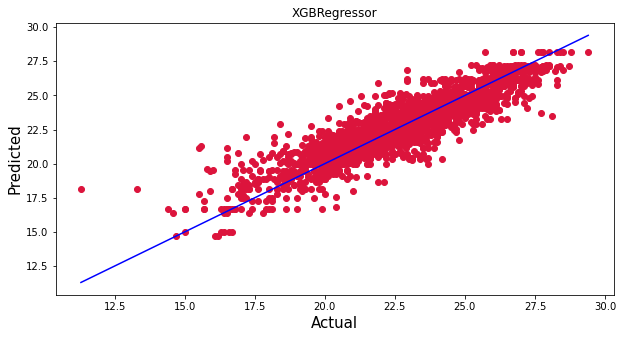

In [223]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction_1, c='crimson')
p1 = max(max(prediction_1), max(y_test))
p2 = min(min(prediction_1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

## Conclusion